## Data Extraction from Google Trends with Pytrends

In [1]:
# Import necessary libraries
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define multiple search terms
kw_list = ["Artificial Intelligence", "Machine Learning", "Deep Learning", "Data Science", "Data Analytics"]

# Get Google Trends data
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

# Retrieve interest over time
df = pytrends.interest_over_time()

# Drop the 'isPartial' column
df = df.drop(columns=['isPartial'])

# Display first few rows
df.head()


,Artificial Intelligence,Machine Learning,Deep Learning,Data Science,Data Analytics
date,,,,,
2024-02-04,73,98,29,79,42
2024-02-11,67,97,30,75,44
2024-02-18,79,98,33,79,45
2024-02-25,74,100,33,79,46
2024-03-03,72,95,32,77,42


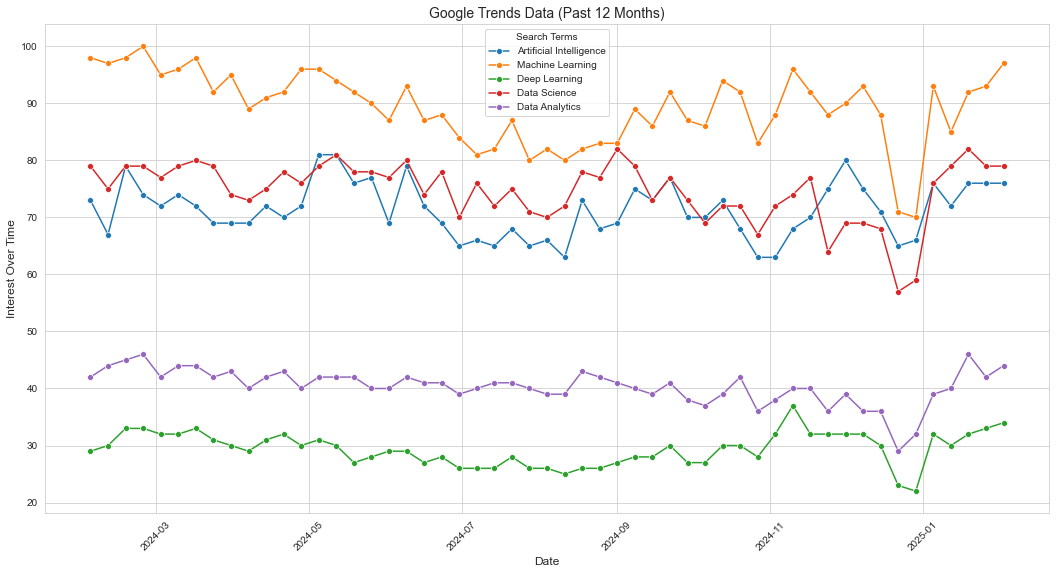

In [3]:
# Plot trends for all search terms
plt.figure(figsize=(18, 9), facecolor="white")
sns.set_style("whitegrid")


# Line plot for each search term
for term in kw_list:
    sns.lineplot(data=df, x=df.index, y=term, label=term, marker='o')

# Formatting the plot
plt.xlabel("Date", fontsize=12)
plt.ylabel("Interest Over Time", fontsize=12)
plt.title("Google Trends Data (Past 12 Months)", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Search Terms")
plt.grid(True)

# Save the plot BEFORE displaying it
plt.savefig("google_trends_plot.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

## Example Analysis for your terms

- Artificial Intelligencce vs Machine Learning

  If AI has values 80-100, and ML stays around 50, AI is more searched
    
- Deep Learning vs Data Science

  If Deep learning fluctuates but Data Science stays steady at 60-80, Data Science has consistent interest.

In [4]:
# Save the data to a CSV file
df.to_csv("google_trends_data.csv")
